# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score,  silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [76]:
file_id = "1otJ1vNj75Bdmhcj5DcStSBWuAfX1wP1W"
direct_link = f"https://drive.google.com/uc?export=download&id={file_id}"
df_obs = pd.read_csv(direct_link)
df_obs.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation


berikut merupakan atribut-atribut yang ada pada dataset:
- Gender : Jenis kelamin
- Age : Umur
- Height : Tinggi badan
- Weight : Berat badan
- family_history_with_overweight : Memiliki keluarga dengan berat badannya tinggi
- FAVC : Frequent consumption of high caloric food / Frekuensi Konsumsi Makanan Berkalori Tinggi
- FCVC : Frequency of consumption of vegetables / Frekuensi Konsumsi Sayur
- NCP : Number of main meals / Berapa kali makan dalam sehari
- CAEC : Consumption of food between meals / Konsumsi Cemilan
- SMOKE : Merokok
- CH2O : Consumption of water daily / Jumlah Air yang diminum dalam sehari
- SCC : Calories consumption monitoring / Pemantauan konsumsi kalori
- FAF : Physical activity frequency / Frekuensi aktivitas fisik
- TUE : Time using technology devices / Lama Waktu Menggunakan Perangkat Teknologi
- CALC : Consumption of alcohol / Konsumsi Alkohol
- MTRANS : Transportation used / Transportasi yang digunakan sehari-hari
- NObeyesdad : Tingkat obesitas dikurangi

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [77]:
df_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [78]:
df_obs.isna().sum()

,0
id,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0


In [79]:
df_obs.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,20758.0,NaN,NaN,NaN,10378.5,5992.46278,0.0,5189.25,10378.5,15567.75,20757.0
Gender,20758,2,Female,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20758.0,NaN,NaN,NaN,23.841804,5.688072,14.0,20.0,22.815416,26.0,61.0
Height,20758.0,NaN,NaN,NaN,1.700245,0.087312,1.45,1.631856,1.7,1.762887,1.975663
Weight,20758.0,NaN,NaN,NaN,87.887768,26.379443,39.0,66.0,84.064875,111.600553,165.057269
family_history_with_overweight,20758,2,yes,17014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,20758,2,yes,18982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,20758.0,NaN,NaN,NaN,2.445908,0.533218,1.0,2.0,2.393837,3.0,3.0
NCP,20758.0,NaN,NaN,NaN,2.761332,0.705375,1.0,3.0,3.0,3.0,4.0
CAEC,20758,4,Sometimes,17529,NaN,NaN,NaN,NaN,NaN,NaN,NaN


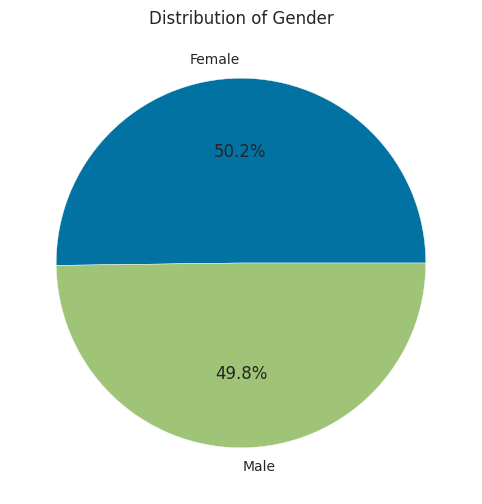

In [80]:
plt.figure(figsize=(10, 6))
plt.pie(df_obs['Gender'].value_counts(), labels=df_obs['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.show()

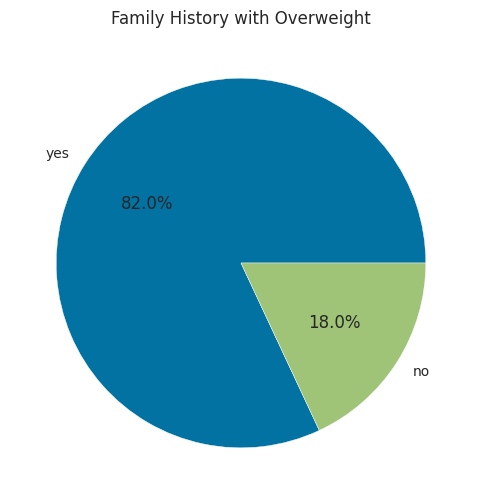

In [81]:
plt.figure(figsize=(10, 6))
plt.pie(df_obs['family_history_with_overweight'].value_counts(), labels=df_obs['family_history_with_overweight'].value_counts().index, autopct='%1.1f%%')
plt.title('Family History with Overweight')
plt.show()

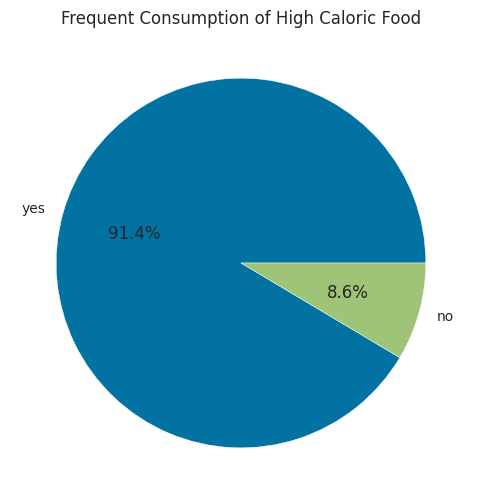

In [82]:
plt.figure(figsize=(10, 6))
plt.pie(df_obs['FAVC'].value_counts(), labels=df_obs['FAVC'].value_counts().index, autopct='%1.1f%%')
plt.title('Frequent Consumption of High Caloric Food')
plt.show()

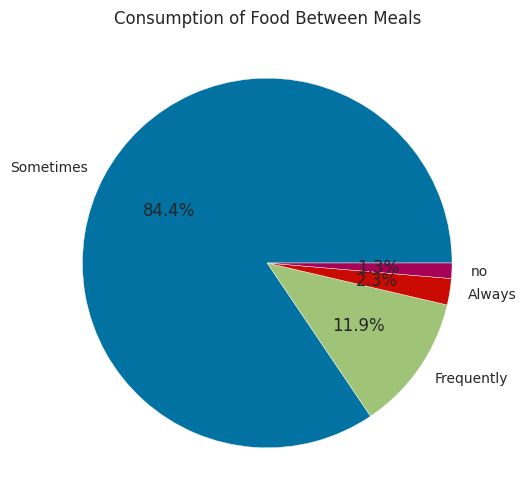

In [83]:
plt.figure(figsize=(10, 6))
plt.pie(df_obs['CAEC'].value_counts(), labels=df_obs['CAEC'].value_counts().index, autopct='%1.1f%%')
plt.title('Consumption of Food Between Meals')
plt.show()

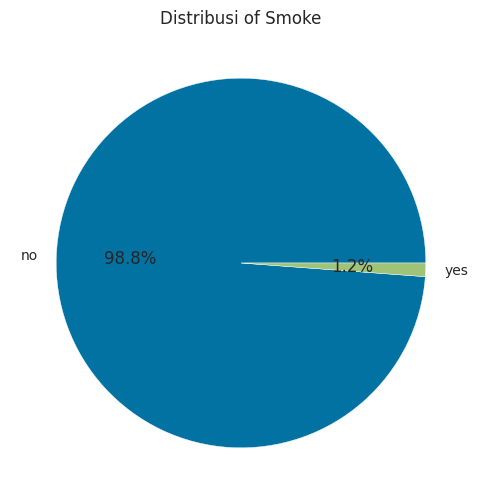

In [84]:
plt.figure(figsize=(10, 6))
plt.pie(df_obs['SMOKE'].value_counts(), labels=df_obs['SMOKE'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribusi of Smoke')
plt.show()

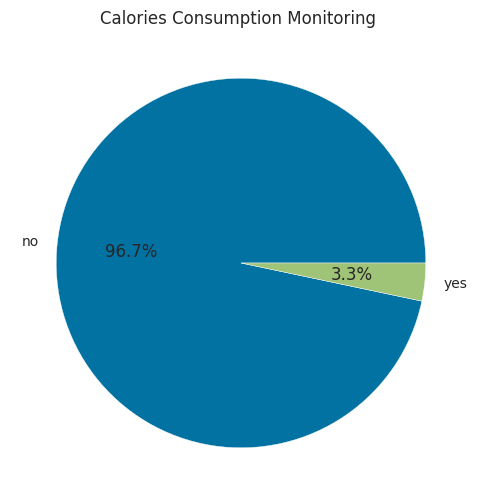

In [85]:
plt.figure(figsize=(10, 6))
plt.pie(df_obs['SCC'].value_counts(), labels=df_obs['SCC'].value_counts().index, autopct='%1.1f%%')
plt.title('Calories Consumption Monitoring ')
plt.show()

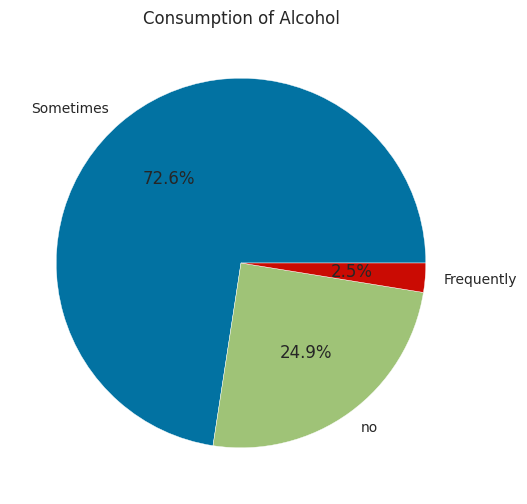

In [86]:
plt.figure(figsize=(10, 6))
plt.pie(df_obs['CALC'].value_counts(), labels=df_obs['CALC'].value_counts().index, autopct='%1.1f%%')
plt.title('Consumption of Alcohol')
plt.show()

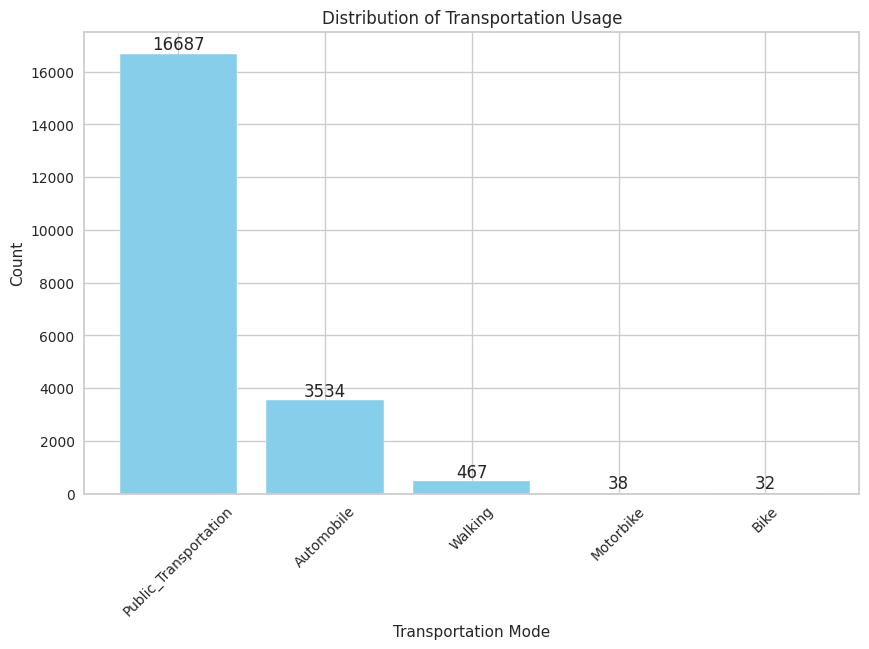

In [87]:
plt.figure(figsize=(10, 6))
mtrans_counts = df_obs['MTRANS'].value_counts()
bars = plt.bar(mtrans_counts.index, mtrans_counts.values, color='skyblue')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Distribution of Transportation Usage')
plt.xlabel('Transportation Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

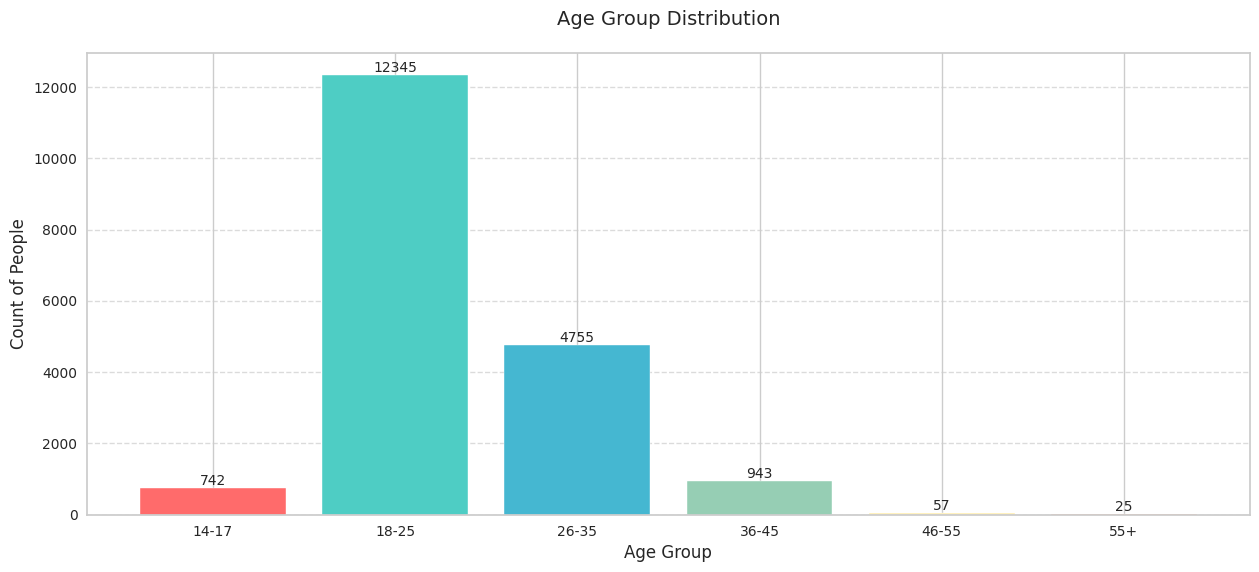

In [88]:
age14_17 = df_obs.Age[(df_obs.Age >= 14) & (df_obs.Age <= 17)]
age18_25 = df_obs.Age[(df_obs.Age >= 18) & (df_obs.Age <= 25)]
age26_35 = df_obs.Age[(df_obs.Age >= 26) & (df_obs.Age <= 35)]
age36_45 = df_obs.Age[(df_obs.Age >= 36) & (df_obs.Age <= 45)]
age46_55 = df_obs.Age[(df_obs.Age >= 46) & (df_obs.Age <= 55)]
age55_above = df_obs.Age[df_obs.Age > 55]

x = ["14-17", "18-25", "26-35", "36-45", "46-55", "55+"]
y = [
    len(age14_17.values),
    len(age18_25.values),
    len(age26_35.values),
    len(age36_45.values),
    len(age46_55.values),
    len(age55_above.values)
]

plt.figure(figsize=(15, 6))
bars = plt.bar(x, y, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD', '#FF9F76'])

plt.title("Age Group Distribution", fontsize=14, pad=20)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count of People", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.,
        height + 1,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xticks(fontsize=10)
plt.show()

In [89]:
sns.set_style("whitegrid")
sns.pairplot(df_obs, hue="Gender", diag_kind="kde", height=2, palette="coolwarm")

plt.show()


Output hidden; open in https://colab.research.google.com to view.

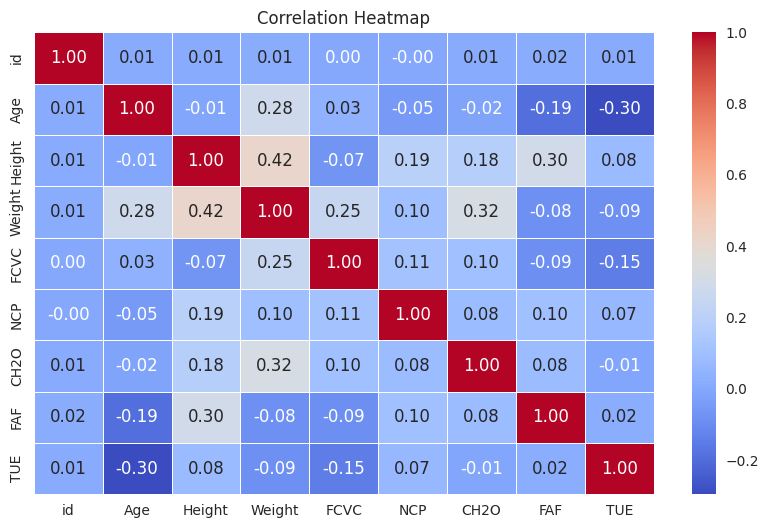

In [90]:
num_cols = df_ob.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10, 6))
sns.heatmap(df_obs[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

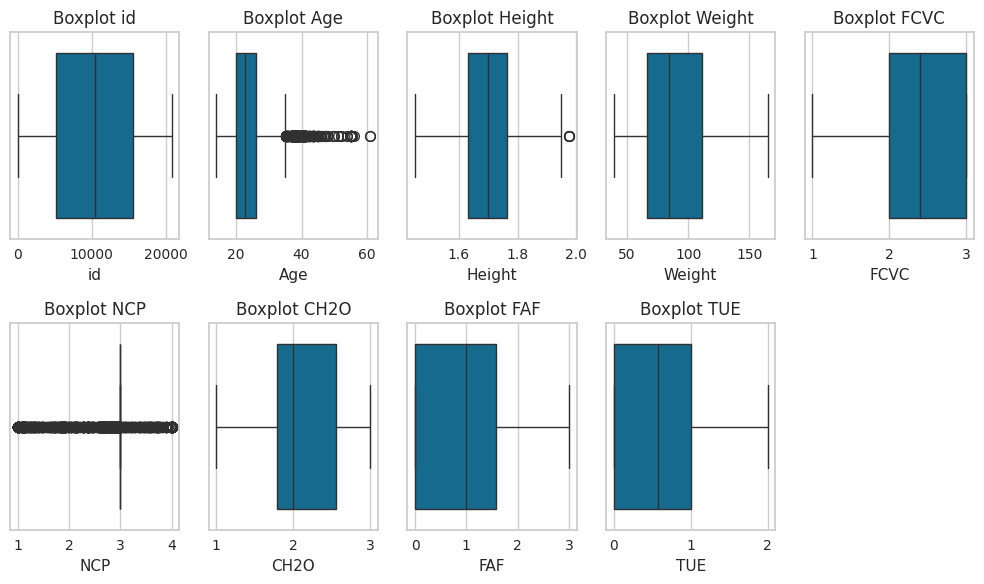

In [91]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols)//2 + 1, i + 1)
    sns.boxplot(x=df_obs[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

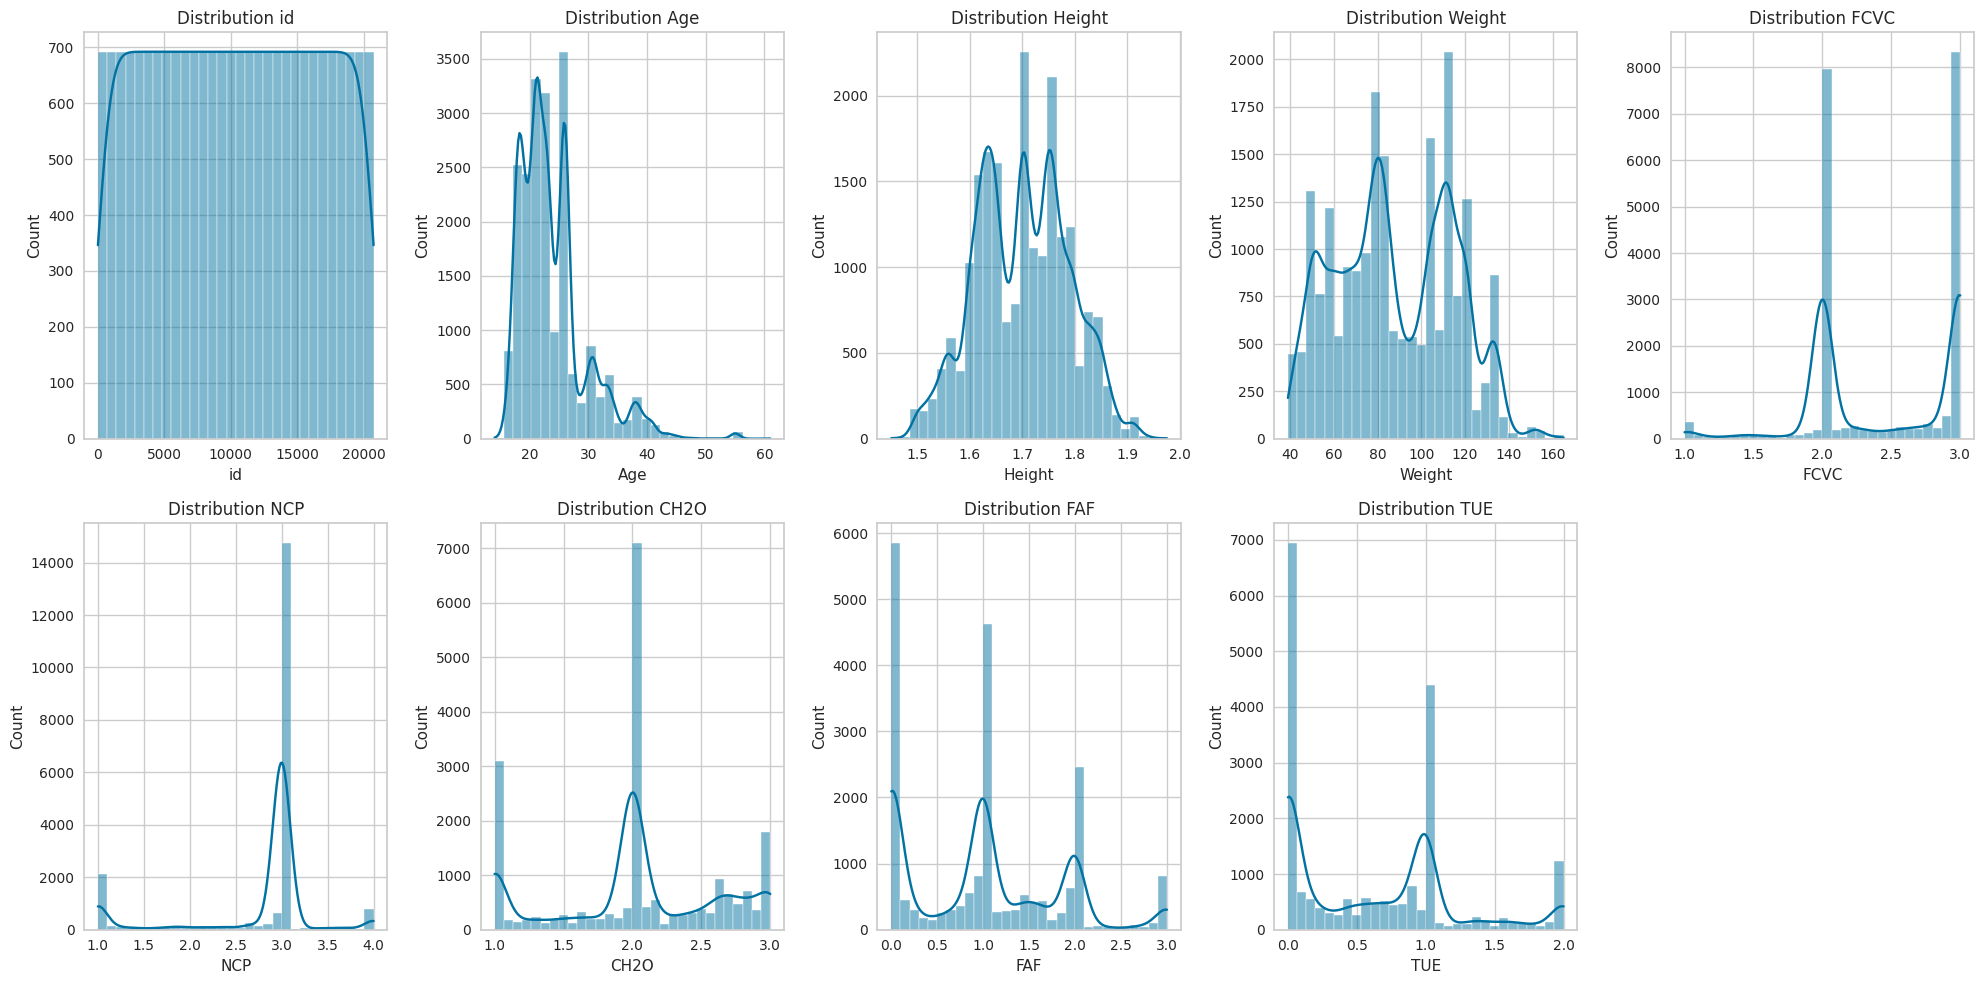

In [92]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols)//2 + 1, i + 1)
    sns.histplot(df_obs[col], kde=True, bins=30)
    plt.title(f"Distribution {col}")
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [94]:
df_obs = df_obs.drop(columns=['id'], errors='ignore')

In [95]:
def remove_outliers(df, column):
    if df[column].dtype not in ['int64', 'float64']:
        print(f"Skipping column {column} (not numeric)")
        return df

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

outlier_columns = ['Age', 'Height', 'Weight', 'NCP', 'CALC', 'CH2O', 'CAEC']
outlier_columns = [col for col in outlier_columns if df_obs[col].dtype in ['int64', 'float64']]

for col in outlier_columns:
    df_obs = remove_outliers(df_obs, col)


In [96]:
categorical_cols = ['CAEC', 'CALC', 'MTRANS', 'Gender', 'FAVC', 'SMOKE', 'SCC', 'family_history_with_overweight']
for col in categorical_cols:
    print(f"Unique values in {col}:", df_obs[col].unique())

Unique values in CAEC: ['Frequently' 'Sometimes' 'no' 'Always']
Unique values in CALC: ['no' 'Sometimes' 'Frequently']
Unique values in MTRANS: ['Automobile' 'Public_Transportation' 'Walking' 'Bike' 'Motorbike']
Unique values in Gender: ['Female' 'Male']
Unique values in FAVC: ['yes' 'no']
Unique values in SMOKE: ['no' 'yes']
Unique values in SCC: ['no' 'yes']
Unique values in family_history_with_overweight: ['yes' 'no']


In [97]:
df_obs.loc[:, 'Gender'] = df_obs['Gender'].map({'Male': 1, 'Female': 0})
df_obs.loc[:, 'family_history_with_overweight'] = df_obs['family_history_with_overweight'].map({'yes': 1, 'no': 0})
df_obs.loc[:, 'SCC'] = df_obs['SCC'].map({'yes': 1, 'no': 0})
df_obs.loc[:, 'FAVC'] = df_obs['FAVC'].map({'yes': 1, 'no': 0})
df_obs.loc[:, 'SMOKE'] = df_obs['SMOKE'].map({'yes': 1, 'no': 0})

In [98]:
encoder = OrdinalEncoder()
df_obs[['CAEC', 'CALC']] = encoder.fit_transform(df_obs[['CAEC', 'CALC']])

In [99]:
mtrans_dummies = pd.get_dummies(df_obs['MTRANS'], prefix='MTRANS')
df_obs = pd.concat([df_obs.drop('MTRANS', axis=1), mtrans_dummies], axis=1)

In [100]:
df_obs['BMI'] = df_obs['Weight'] / (df_obs['Height'] ** 2)
df_obs['Weight_FAF_Ratio'] = df_obs['Weight'] / (df_obs['FAF'] + 1)
df_obs['Obesity_Risk_Score'] = (df_obs['BMI'] * 0.5) + (df_obs['family_history_with_overweight'] * 0.3) + (df_obs['FAVC'] * 0.1) + (df_obs['CAEC'] * 0.1)
df_obs['Lifestyle_Score'] = (df_obs['FAF'] * 0.4) + (df_obs['TUE'] * 0.2) - (df_obs['CALC'] * 0.2) + (df_obs['CH2O'] * 0.2)
df_obs['Diet_Score'] = (df_obs['FAVC'] * 0.4) + (df_obs['CAEC'] * 0.3) - (df_obs['CH2O'] * 0.3)

In [101]:
df_obs["Diet_Score"] = pd.to_numeric(df_obs["Diet_Score"], errors="coerce")
df_obs["Obesity_Risk_Score"] = pd.to_numeric(df_obs["Obesity_Risk_Score"], errors="coerce")


In [102]:
X = df_obs.select_dtypes(include=['int64', 'float64'])

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [103]:
df_obs.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,BMI,Weight_FAF_Ratio,Obesity_Risk_Score,Lifestyle_Score,Diet_Score
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.0,1.0,0,...,True,False,False,False,False,23.422091,28.500000,12.211045,0.600000,0.100000
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.0,2.0,0,...,False,False,False,True,False,44.855798,53.193735,23.027899,0.877997,0.497782
5,1,18.128249,1.748524,51.552595,1,1,2.919751,3.0,2.0,0,...,False,False,False,True,False,16.861932,17.594544,9.030966,1.199523,0.358735
6,1,29.883021,1.754711,112.725005,1,1,1.991240,3.0,2.0,0,...,True,False,False,False,False,36.610787,112.725005,18.905394,0.339390,0.400000
7,1,29.891473,1.750150,118.206565,1,1,1.397468,3.0,2.0,0,...,True,False,False,False,False,38.591446,73.941260,19.895723,0.439462,0.400000


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [104]:
selected_features = ['Lifestyle_Score', 'BMI', 'Weight_FAF_Ratio', 'Obesity_Risk_Score', 'SCC']
X = df_obs[selected_features]

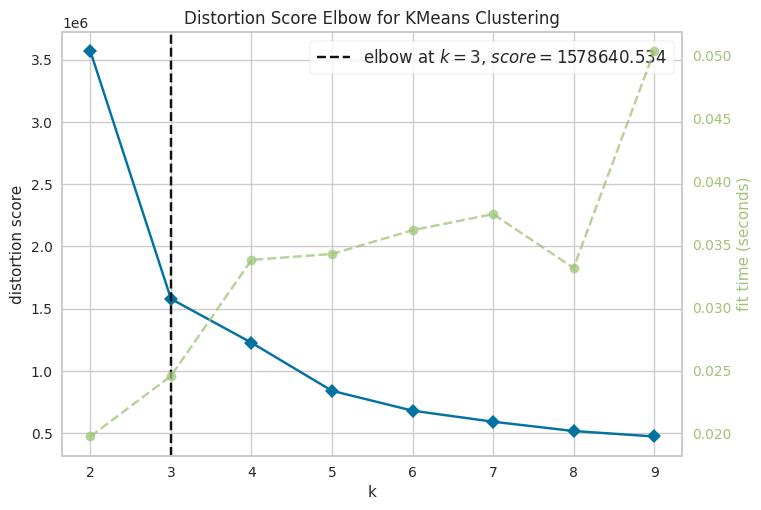

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
kmeans = KMeans(init='k-means++', random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X)
visualizer.show()

In [106]:
optimal_clusters = 3
kmeans_model = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=50, random_state=42)
df_obs['Cluster'] = kmeans_model.fit_predict(X)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [107]:
sil_score = silhouette_score(X, df_obs['Cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.579


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [108]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=20)
clusters_pca = kmeans_pca.fit_predict(X_pca)
score_pca = silhouette_score(X_pca, clusters_pca)
print(f"Silhouette Score dengan PCA: {score_pca:.3f}")

Silhouette Score dengan PCA: 0.653


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

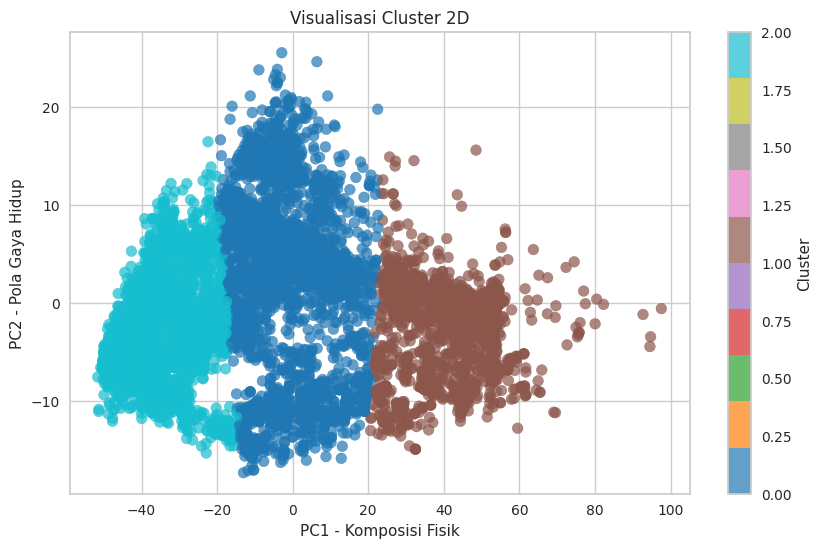

In [109]:
pca_2d = PCA(n_components=2)
principal_components = pca_2d.fit_transform(df_obs[selected_features])

plt.figure(figsize=(10,6))
plt.scatter(principal_components[:,0], principal_components[:,1],
            c=df_obs['Cluster'], cmap='tab10', s=60, alpha=0.7)
plt.title('Visualisasi Cluster 2D')
plt.xlabel('PC1 - Komposisi Fisik')
plt.ylabel('PC2 - Pola Gaya Hidup')
plt.colorbar(label='Cluster')
plt.show()

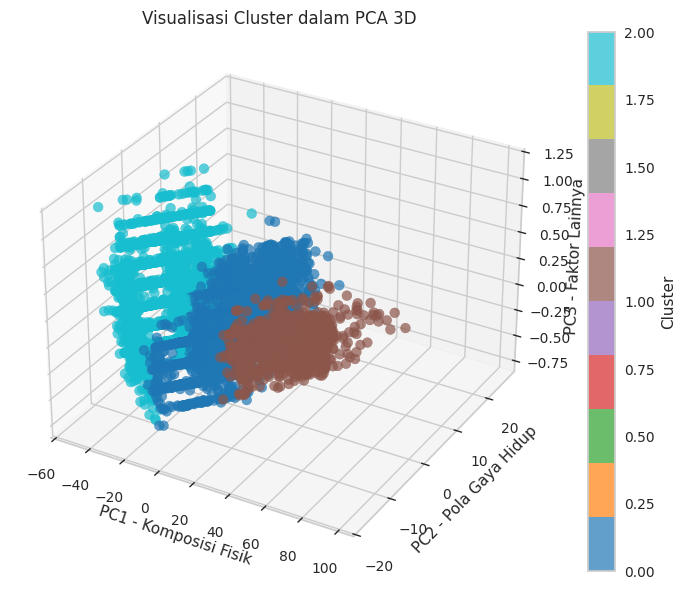

In [110]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
principal_components = pca_3d.fit_transform(df_obs[selected_features])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(principal_components[:, 0],
                principal_components[:, 1],
                principal_components[:, 2],
                c=df_obs['Cluster'], cmap='tab10', s=50, alpha=0.7)

ax.set_xlabel('PC1 - Komposisi Fisik')
ax.set_ylabel('PC2 - Pola Gaya Hidup')
ax.set_zlabel('PC3 - Faktor Lainnya')

ax.set_title('Visualisasi Cluster dalam PCA 3D')
plt.colorbar(sc, label='Cluster')

plt.show()

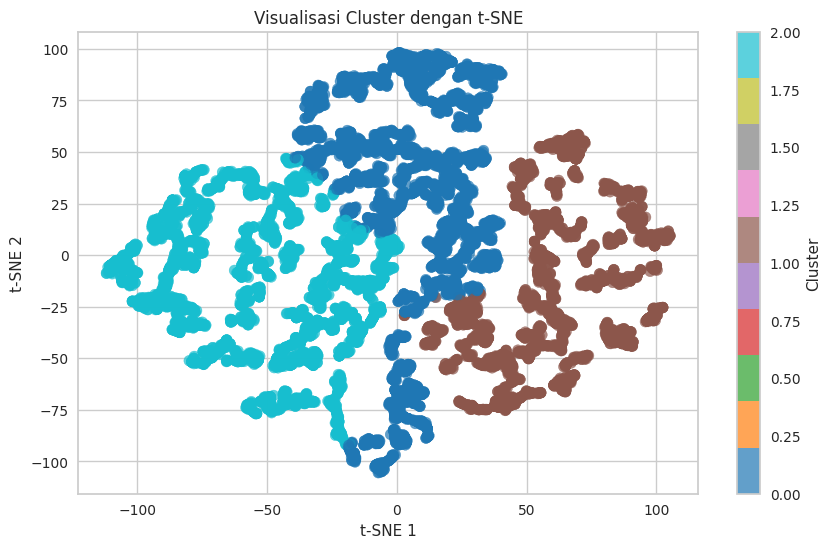

In [111]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(df_obs[selected_features])

plt.figure(figsize=(10,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df_obs['Cluster'], cmap='tab10', s=60, alpha=0.7)
plt.title('Visualisasi Cluster dengan t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [112]:
df_obs['Risk_Category'] = df_obs['Cluster'].replace({0: 'Medium - Semi Active', 1: 'High - Passive', 2: 'Low - Active'})

In [113]:
# Inverse Gender, FAVC, SMOKE, SCC, family_history_with_overweight
binary_cols = ['Gender', 'FAVC', 'SMOKE', 'SCC', 'family_history_with_overweight']
for col in binary_cols:
    df_obs[col] = df_obs[col].map({1: 'Male', 0: 'Female'} if col == 'Gender' else {1: 'yes', 0: 'no'})

# Inverse CAEC dan CALC
df_obs[['CAEC', 'CALC']] = encoder.inverse_transform(df_obs[['CAEC', 'CALC']])

# Invers MTRANS
mtrans_cols = [col for col in df_obs.columns if col.startswith('MTRANS_')]
df_obs['MTRANS'] = df_obs[mtrans_cols].idxmax(axis=1).str.replace('MTRANS_', '')
df_obs = df_obs.drop(columns=mtrans_cols)


In [114]:
df_obs.head().transpose()

,1,3,5,6,7
Gender,Female,Female,Male,Male,Male
Age,18.0,20.952737,18.128249,29.883021,29.891473
Height,1.56,1.71073,1.748524,1.754711,1.75015
Weight,57.0,131.274851,51.552595,112.725005,118.206565
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.0,3.0,2.919751,1.99124,1.397468
NCP,3.0,3.0,3.0,3.0,3.0
CAEC,Frequently,Sometimes,Sometimes,Sometimes,Sometimes
SMOKE,no,no,no,no,no


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

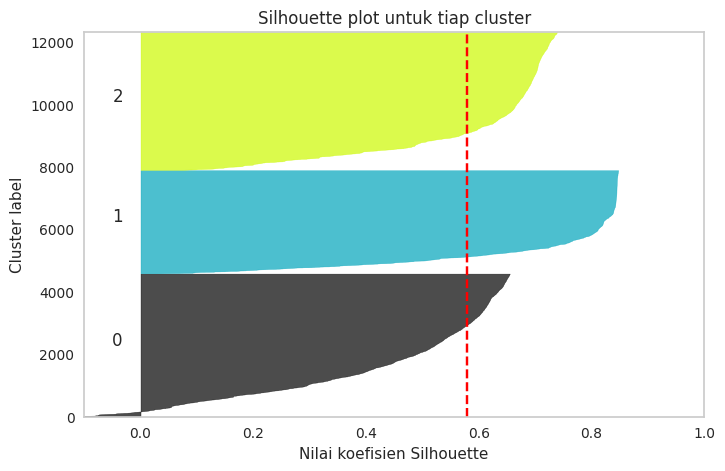

In [115]:
silhouette_avg = silhouette_score(X, df_obs['Cluster'])
sample_silhouette_values = silhouette_samples(X, df_obs['Cluster'])

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (optimal_clusters + 1) * 10])

y_lower = 10
for i in range(optimal_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[df_obs['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_title("Silhouette plot untuk tiap cluster")
ax1.set_xlabel("Nilai koefisien Silhouette")
ax1.set_ylabel("Cluster label")
ax1.grid(False)
plt.show()

In [117]:
cluster_means = df_obs.groupby('Risk_Category')[['Lifestyle_Score', 'BMI', 'Weight_FAF_Ratio', 'Obesity_Risk_Score']].mean().reset_index()
scc_counts = df_obs.groupby(['Risk_Category', 'SCC']).size().unstack(fill_value=0)
scc_percentages = scc_counts.div(scc_counts.sum(axis=1), axis=0) * 100

In [120]:
print("Persentase SCC per Risk Category:\n")
print(scc_percentages.to_string())

print("\nRata-rata Fitur Berdasarkan Risk Category:\n")
cluster_means["Cluster"] = cluster_means.index
print(cluster_means.to_string(index=False))


Persentase SCC per Risk Category:

SCC                          no       yes
Risk_Category                            
High - Passive        99.939412  0.060588
Low - Active          93.362030  6.637970
Medium - Semi Active  98.950590  1.049410

Rata-rata Fitur Berdasarkan Risk Category:

       Risk_Category  Lifestyle_Score       BMI  Weight_FAF_Ratio  Obesity_Risk_Score  Cluster
      High - Passive         0.383009 39.112754        104.964077           20.152924        0
        Low - Active         0.982691 23.801546         27.882443           12.363845        1
Medium - Semi Active         0.766874 35.502353         56.080873           18.321290        2


# Analisis Karakteristik Cluster dari Model KMeans
#1. Cluster 0 (High - Passive):
   - **BMI** : 39.11
   - **Weight_FAF_Ratio** : 104.96
   - **Obesity_Risk_Score** : 20.15
   - **Lifestyle_Score** : 0.38
   - **SCC** (no: 99.93%; yes: 0.06%)
   - **Analisis** : Cluster ini mencakup kelompok berisiko tinggi obesitas dengan gaya hidup pasif. Kelompok ini cenderung memiliki BMI yang sangat tinggi, riwayat keluarga obesitas, pola makan tidak sehat, melakukan aktivitas fisik yang rendah, dan hampir semua tidak memantau asupan kalori.

#2. Cluster 1 (Low - Active):
   - **BMI** : 23.80
   - **Weight_FAF_Ratio** : 27.88
   - **Obesity_Risk_Score** : 12.36
   - **Lifestyle_Score** : 0.98
   - **SCC** (no: 93.36%; yes: 6.63%)
   - **Analisis** : Cluster ini mencakup kelompok resiko obesitas rendah dengan gaya hidup paling aktif. Kelompok ini cenderung memiliki BMI dalam rentan sehat karena rasio berat badan dan aktivitas fisik seimbang, pola makan terkontrol. Walaupun mayoritas tidak memantau asupan kalori, namun tetap sehat.

#3. Cluster 2 (Medium - Semi Active):
   - **BMI** : 35.50
   - **Weight_FAF_Ratio** : 56.08
   - **Obesity_Risk_Score** : 18.32
   - **Lifestyle_Score** : 0.76
   - **SCC** (no: 98.95%; yes: 1.04%)
   - **Analisis** : Cluster ini mencakup kelompok resiko obesitas ditingkat sedang dengan gaya hidup cukup aktif. Kelompok ini cenderung memiliki BMI tinggi, aktivitas fisik tidak konsisten, pola makan tidak teratur, dan minim pemantuan asupan kalori meski berisiko.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [121]:
df_obs.to_csv('Dataset_clustering.csv', index=False)